<a href="https://colab.research.google.com/github/AhmedSamir32179/Brain-tumor-image_classification-./blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/amazon_alexa.tsv",sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
def sentimants(df):
  if df['rating']>3:
    return 'positive'
  else:
    return 'negative'
data['sentiment']=data.apply(sentimants,axis=1)
data.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,positive


In [5]:
data_val=data[['verified_reviews','sentiment']]
data_val.isnull().sum()

verified_reviews    0
sentiment           0
dtype: int64

In [6]:
data_val

,verified_reviews,sentiment
0,Love my Echo!,positive
1,Loved it!,positive
2,"Sometimes while playing a game, you can answer...",positive
3,I have had a lot of fun with this thing. My 4 ...,positive
4,Music,positive
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",positive
3146,"Listening to music, searching locations, check...",positive
3147,"I do love these things, i have them running my...",positive
3148,Only complaint I have is that the sound qualit...,positive


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def cleaning(df,stop_words):
  df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join(x.lower()for x in x.split()))
  df['verified_reviews']=df['verified_reviews'].str.replace('[^\w\s]','')
  df['verified_reviews']=df['verified_reviews'].str.replace('\d','')
  df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join([x for x in x.split()if x not in stop_words]))
  df['verified_reviews']=df['verified_reviews'].apply(lambda x:" ".join(Word(x).lemmatize()for x in x.split()))
stop_words=stopwords.words('english')
cleaning(data_val,stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [9]:
data_val

,verified_reviews,sentiment
0,love echo,positive
1,loved,positive
2,sometimes playing game answer question correct...,positive
3,lot fun thing yr old learns dinosaur control l...,positive
4,music,positive
...,...,...
3145,perfect kid adult everyone,positive
3146,listening music searching location checking ti...,positive
3147,love thing running entire home tv light thermo...,positive
3148,complaint sound quality isnt great mostly use ...,positive


In [10]:
import wordcloud
common_words=''
for i in data_val.verified_reviews:
  i=str(i)
  tokens=i.split()
  common_words+=' '.join(tokens)+' '
common_words

'love echo loved sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well music received echo gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random question hear response seem smartbon politics yet think th one ive purchased im working getting one every room house really like feature offer specifily playing music echo controlling light throughout house look great love ive listened song havent heard since childhood get news weather information great sent year old dad talk constantly love learning knew thing eveyday still figuring everything work far easy use understand make laugh time purchased mother knee problem give something t

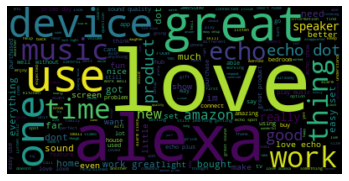

In [11]:
worldcloud=wordcloud.WordCloud().generate(common_words)
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
lb=LabelEncoder()
data_val['sentiment']=lb.fit_transform(data_val['sentiment'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:

from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=300,split=' ')
tokenizer.fit_on_texts(data_val['verified_reviews'].values)
x=tokenizer.texts_to_sequences(data_val['verified_reviews'].values)
x=pad_sequences(x)

In [14]:
x.shape

(3150, 137)

In [15]:
model=Sequential()
model.add(Embedding(500,120,input_length=x.shape[1]))
model.add(SpatialDropout1D(.4))
model.add(LSTM(176,dropout=.2,recurrent_dropout=.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 137, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 137, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________


In [17]:
y=pd.get_dummies(data_val['sentiment'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
from keras.callbacks import TensorBoard
cb=TensorBoard()
model.fit(x_train,y_train,epochs=5,batch_size=10,callbacks=cb,validation_data=[x_test,y_test])

Epoch 1/5
252/252 [==============================] - 110s 415ms/step - loss: 0.3584 - accuracy: 0.8730 - val_loss: 0.2978 - val_accuracy: 0.8603
Epoch 2/5
252/252 [==============================] - 100s 396ms/step - loss: 0.2476 - accuracy: 0.8968 - val_loss: 0.2655 - val_accuracy: 0.8778
Epoch 3/5
252/252 [==============================] - 99s 395ms/step - loss: 0.2024 - accuracy: 0.9246 - val_loss: 0.2420 - val_accuracy: 0.8905
Epoch 4/5
252/252 [==============================] - 99s 394ms/step - loss: 0.1824 - accuracy: 0.9302 - val_loss: 0.2577 - val_accuracy: 0.8873
Epoch 5/5
252/252 [==============================] - 99s 393ms/step - loss: 0.1659 - accuracy: 0.9357 - val_loss: 0.2364 - val_accuracy: 0.8968
